In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import mlflow
import os
import shutil
import zipfile
import numpy as np

In [2]:
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = "./credentials.json"
mlflow.set_tracking_uri("http://34.176.189.11:5000")

In [25]:
activations_run_id_sparsity_4 = "126c466046174a38b8492071e7186ad9"
activations_run_id_sparsity_8 = "e246bb069b924c6680ff09b973e9b537"
activations_run_id_sparsity_16 = "e515ef2d217a4b15b9dc3d8997a0a1dc"
activations_run_id_sparsity_32 = "3702363c0e924f7d802f248898c74627"

In [4]:
def get_activations(run_id):
    features_path = mlflow.artifacts.download_artifacts(
        run_id=run_id, artifact_path="activations_data.zip"
    )

    folder_path = f"./activations_data_run_{run_id}"

    if not os.path.exists(folder_path):
        os.makedirs(folder_path)
    else:
        try:
            shutil.rmtree(folder_path)
        except FileNotFoundError:
            print(f"The folder '{folder_path}' does not exist.")
        os.makedirs(folder_path)

    with zipfile.ZipFile(features_path, 'r') as zip_ref:
        zip_ref.extractall(folder_path)

    hidden_freqs = pd.read_csv(f"{folder_path}/activations_data/hidden_frequencies.csv")
    feedforward_freqs = pd.read_csv(f"{folder_path}/activations_data/feedforward_frequencies.csv")

    return hidden_freqs, feedforward_freqs

In [26]:
hidden_freqs_sparsity_4, feedforward_freqs = get_activations(activations_run_id_sparsity_4)
hidden_freqs_sparsity_8, _ = get_activations(activations_run_id_sparsity_8)
hidden_freqs_sparsity_16, _ = get_activations(activations_run_id_sparsity_16)
hidden_freqs_sparsity_32, _ = get_activations(activations_run_id_sparsity_32)

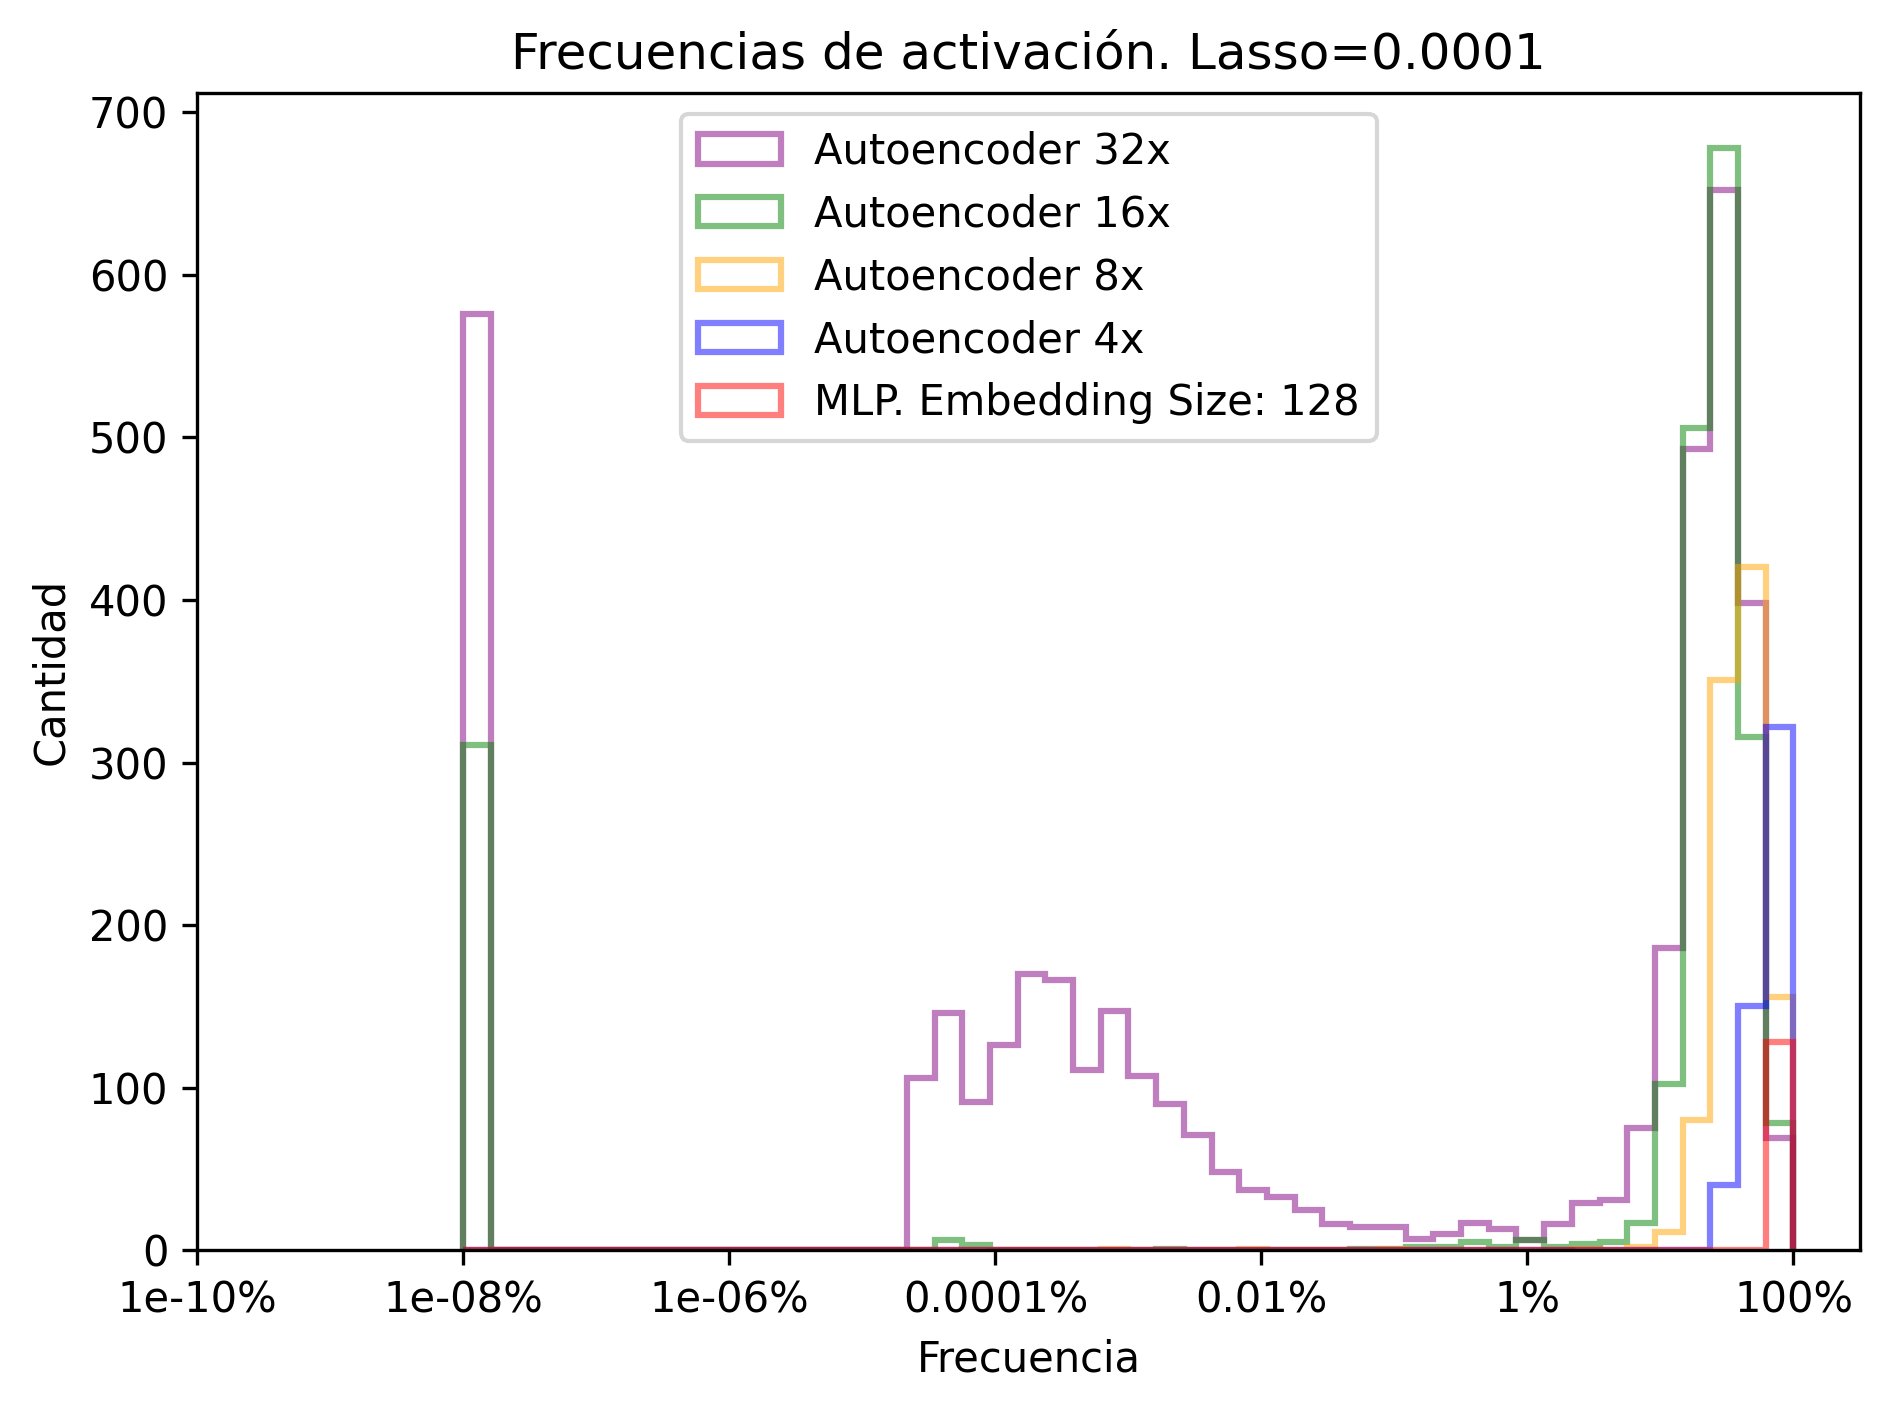

In [46]:
hiddens_4 = hidden_freqs_sparsity_4["frequency"] + 1e-10
hiddens_16 = hidden_freqs_sparsity_16["frequency"] + 1e-10
hiddens_8 = hidden_freqs_sparsity_8["frequency"] + 1e-10
hiddens_32 = hidden_freqs_sparsity_32["frequency"] + 1e-10
log_hiddens_32 = np.log10(hiddens_32)
log_hiddens_16 = np.log10(hiddens_16)
log_hiddens_8 = np.log10(hiddens_8)
log_hiddens_4 = np.log10(hiddens_4)
log_feedforward = np.log10(feedforward_freqs["frequency"])
bins=np.histogram(np.hstack((log_hiddens_4, log_hiddens_8, log_hiddens_16, log_hiddens_32, log_feedforward)), bins=48)[1]

plt.figure(dpi=300)
plt.title("Frecuencias de activación. Lasso=0.0001")
plt.hist(log_hiddens_32, bins=bins, alpha=0.5, edgecolor='purple', histtype='step', linewidth=1.5, label="Autoencoder 32x")
plt.hist(log_hiddens_16, bins=bins, alpha=0.5, edgecolor='green', histtype='step', linewidth=1.5, label="Autoencoder 16x")
plt.hist(log_hiddens_8, bins=bins, alpha=0.5, edgecolor='orange', histtype='step', linewidth=1.5, label="Autoencoder 8x")
plt.hist(log_hiddens_4, bins=bins, alpha=0.5, edgecolor='blue',  histtype='step', linewidth=1.5, label="Autoencoder 4x")
plt.hist(log_feedforward, bins=bins, alpha=0.5, edgecolor='red',  histtype='step', linewidth=1.5, label=f"MLP. Embedding Size: {log_feedforward.shape[0]}")
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")
tick_locs = plt.xticks()[0][:-1]
tick_labels = [f"{100 * 10**x:.3g}%" for x in tick_locs]
plt.xticks(tick_locs, tick_labels)
plt.legend()
plt.tight_layout()
plt.savefig("activations_histogram.png")
plt.show()

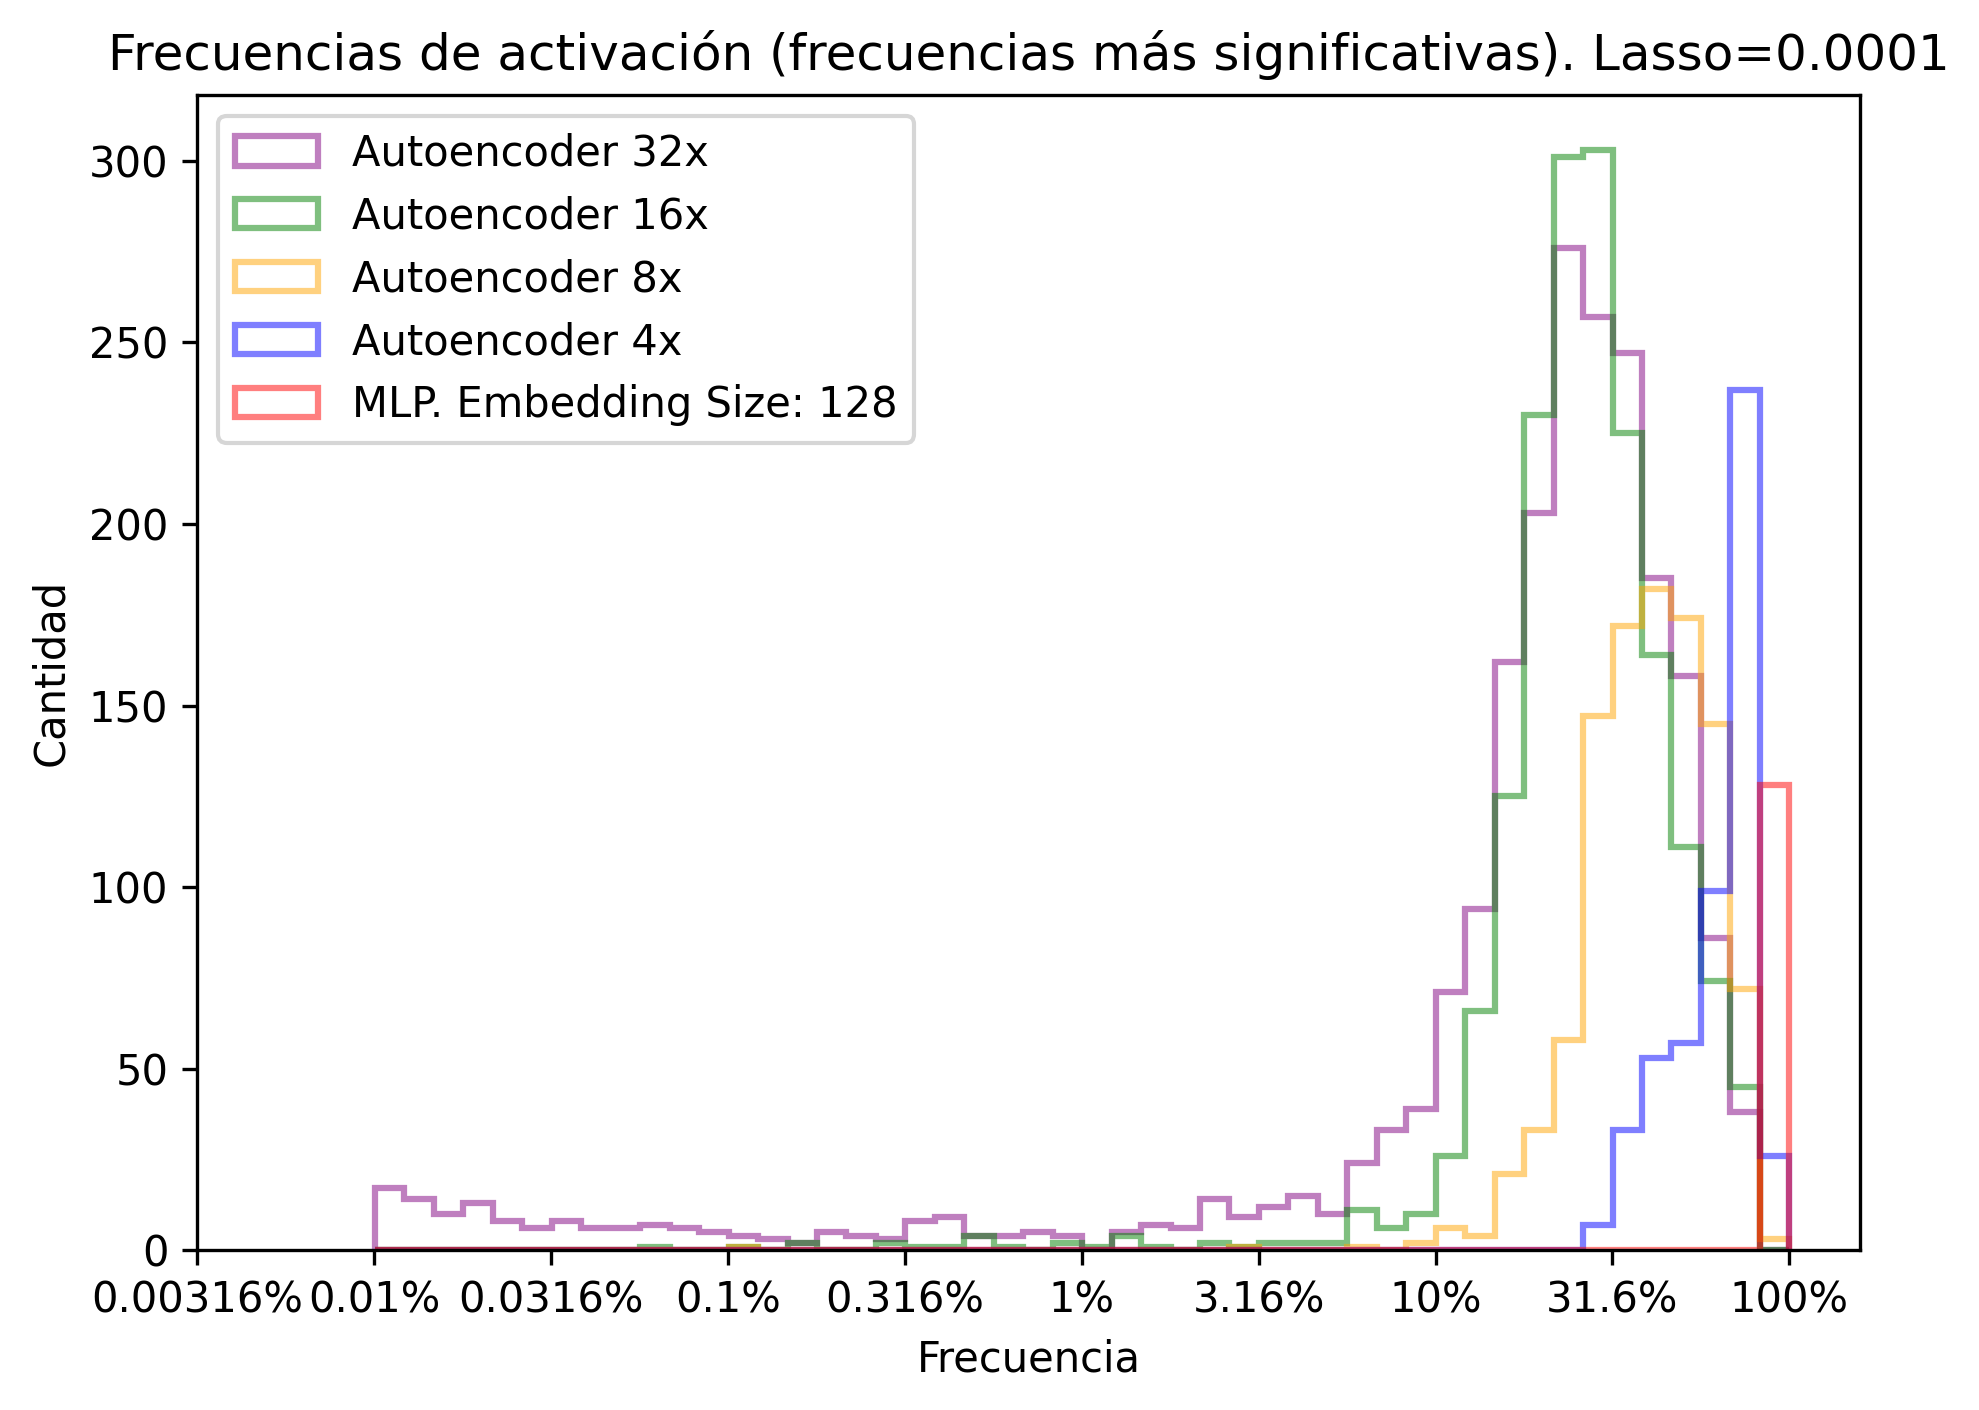

In [47]:
bins=np.histogram(np.hstack(
    (log_hiddens_4[log_hiddens_4 > -4],
    log_hiddens_8[log_hiddens_8 > -4],
    log_hiddens_16[log_hiddens_16 > -4],
    log_hiddens_32[log_hiddens_32 > -4], 
     log_feedforward[log_feedforward > -4])
), bins=48)[1]

plt.figure(dpi=300)
plt.title("Frecuencias de activación (frecuencias más significativas). Lasso=0.0001")
plt.hist(log_hiddens_32[log_hiddens_32 > -4], bins=bins, alpha=0.5, edgecolor='purple', histtype='step', linewidth=1.5, label="Autoencoder 32x")
plt.hist(log_hiddens_16[log_hiddens_16 > -4], bins=bins, alpha=0.5, edgecolor='green', histtype='step', linewidth=1.5, label="Autoencoder 16x")
plt.hist(log_hiddens_8[log_hiddens_8 > -4], bins=bins, alpha=0.5, edgecolor='orange', histtype='step', linewidth=1.5, label="Autoencoder 8x")
plt.hist(log_hiddens_4[log_hiddens_4 > -4], bins=bins, alpha=0.5, edgecolor='blue',  histtype='step', linewidth=1.5, label="Autoencoder 4x")
plt.hist(log_feedforward, bins=bins, alpha=0.5, edgecolor='red',  histtype='step', linewidth=1.5, label=f"MLP. Embedding Size: {log_feedforward.shape[0]}")
plt.xlabel("Frecuencia")
plt.ylabel("Cantidad")
tick_locs = plt.xticks()[0][:-1]
tick_labels = [f"{100 * 10**x:.3g}%" for x in tick_locs]
plt.xticks(tick_locs, tick_labels)
plt.legend()
plt.tight_layout()
plt.savefig("activations_histogram_zoomed.png")
plt.show()